Importing Libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [39]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [40]:
data=pd.read_csv('https://raw.github.com/dsrscientist/dataset1/master/titanic_train.csv')

In [41]:
data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
num_nan=data.isnull().sum()

In [46]:
num_nan

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
#printing the total number of NAN values along with the percentage

num_nan=data.isnull().sum().sort_values(ascending=False)
percentage1=data.isnull().sum()/data.isnull().count()*100
percentage2=(round(percentage1,1)).sort_values(ascending=False)
missing_data=pd.concat([num_nan,percentage2],axis=1,keys=['Total','%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


**Data Visualisation**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Men')

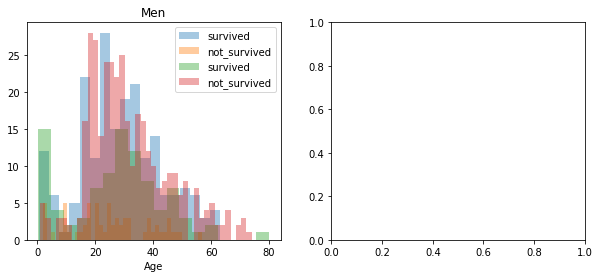

In [48]:
survived='Survived'
not_survived='not Survived'

fig, axes=plt.subplots(nrows=1,ncols=2, figsize=(10,4))
women=data[data['Sex']=='female']
men=data[data['Sex']=='male']

ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18,label='survived',ax=axes[0],kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=40,label='not_survived',ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')

ax=sns.distplot(men[men['Survived']==1].Age.dropna(),bins=18,label='survived',ax=axes[0],kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(),bins=40,label='not_survived',ax=axes[0],kde=False)
ax.legend()
ax.set_title('Men')

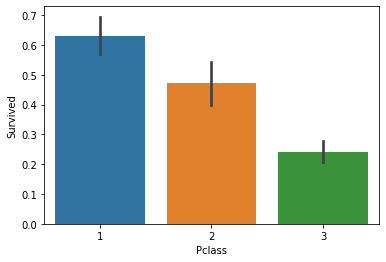

In [49]:
sns.barplot(x='Pclass',y='Survived',data=data)

Clearly it shows that Pclass is contributing to a persons chance of survival. Now,another way of plotting can be done as follows:

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


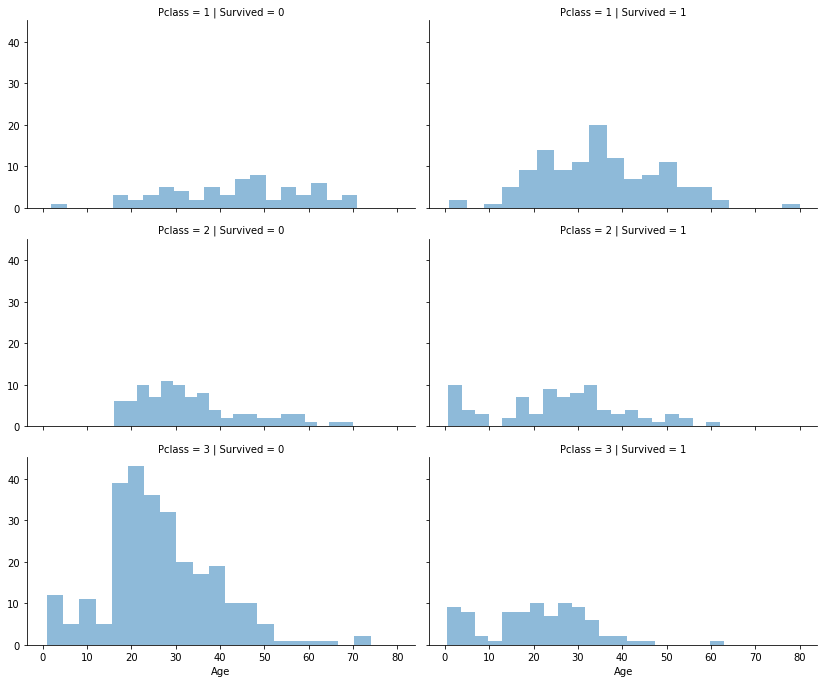

In [50]:
grid=sns.FacetGrid(data,col='Survived',row='Pclass',size=3.2,aspect=1.8) 
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()

**Data Processing**

In [51]:
#dropping unnecessary columns

data=data.drop('PassengerId',axis=1)


In [52]:
m=data.shape[0]
for dataset in range(m): mean=data['Age'].mean()
std=data['Age'].std() 
isnull=data['Age'].isnull().sum()
rand_age=np.random.randint(mean-std,mean+std,size=isnull)
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)]=rand_age 
data["Age"] = age_slice
data["Age"]= data["Age"].astype(int)
data["Age"].isnull().sum()
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [53]:
common_value='S'
for i in range(data.shape[0]):
  data['Embarked']=data['Embarked'].fillna(common_value)

In [54]:
data['Embarked'].isnull().sum()

0

Converting the string values of Embarked into int by using mapping.Here,let’s map ‘S’ as 0 and ‘C’ as 1 and ‘Q’ as 2

In [55]:
embark_mapping={
    'S':0,
    'C':1,
    'Q':2
    }
data.Embarked=data.Embarked.map(embark_mapping)

data['Embarked'].head()

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64

In [56]:
data['Fare']=data['Fare'].astype('int')
data['Fare'].head()

0     7
1    71
2     7
3    53
4     8
Name: Fare, dtype: int64

In [57]:
sex_mapping={'male' :0,'female' :1}
data.Sex=data.Sex.map(sex_mapping)
data['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [58]:
data['Fare']=data['Fare'].astype('int')
data['Fare'].head()

0     7
1    71
2     7
3    53
4     8
Name: Fare, dtype: int64

In [59]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,1
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,0
4,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,0


In [60]:
data=data.drop(['Ticket','Cabin','Name'],axis=1)
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0
5,0,3,0,24,0,0,8,2
6,0,1,0,54,0,0,51,0
7,0,3,0,2,3,1,21,0
8,1,3,1,27,0,2,11,0
9,1,2,1,14,1,0,30,1


In [61]:
data.shape

(891, 8)

splitting data into training and testing data.

In [62]:
split = int(0.8*data.shape[0])
x_train=data.iloc[:split,1:]
x_test=data.iloc[split:,1:]

y_train=data.iloc[:split,0]
y_test=data.iloc[split:,0]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(712, 7) (712,)
(179, 7) (179,)


**Logistic Regression**

In [65]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=100)
lr.fit(x_train,y_train)
acc=lr.score(x_test,y_test)*100
print('accuracy is :',round(acc,2))

accuracy is : 83.24


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Random Forest Classifier**

In [66]:
random_forest=RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train,y_train)
acc_random_forest=round(random_forest.score(x_test,y_test) * 100,2)
print('accuracy is :',(acc_random_forest,2))

accuracy is : (82.68, 2)


**Decision Tree Classifier**

In [67]:
regressor=DecisionTreeClassifier(random_state=1)
regressor.fit(x_train,y_train)
acc_dt=regressor.score(x_test,y_test)*100
print('accuracy is :',(acc_dt,2))

accuracy is : (79.88826815642457, 2)


**K-Nearest Neighbourhood Classifier**

In [68]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
acc_knc=knc.score(x_test,y_test)*100
print('accuracy is:', round(acc_knc,2))

accuracy is: 75.42


Hence,Here we can summarise that Logistic Regression gave more accuracy.

I will be posting soon about using other classifiers and also accuracy change with hyperparameter tuning.